In [27]:
# Import Libraries, Census, and Keys
import pandas as pd
import requests
from census import Census
from us import states
import gmaps
import json
import numpy as np
from config import (api_key, gkey)

c = Census(api_key, year=2017)

# Configure gmaps (not sure why we need this)
gmaps.configure(api_key=gkey)



In [28]:
#import demographics raw data
demo1_df = pd.read_csv('1718_Enrollment_Data_(demographics).csv')

demo1_df.head() 

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,...,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,10767781038306,Fresno,Washington Unified,Washington High,6,F,0,0,0,0,...,0,0,0,10,4,7,6,0,27,0
1,10767781038306,Fresno,Washington Unified,Washington High,2,M,0,0,0,0,...,0,0,0,16,11,7,14,0,48,0
2,10767781038306,Fresno,Washington Unified,Washington High,1,F,0,0,0,0,...,0,0,0,2,1,14,1,0,18,0
3,10767781038306,Fresno,Washington Unified,Washington High,6,M,0,0,0,0,...,0,0,0,7,9,6,8,0,30,0
4,10767781038306,Fresno,Washington Unified,Washington High,0,M,0,0,0,0,...,0,0,0,3,7,3,0,0,13,0


In [29]:
#modify demo to include ethnicity as columns
demo2_df = demo1_df.pivot_table(values='ENR_TOTAL', index='CDS_CODE', columns='ETHNIC', aggfunc='sum')
demo2_df.head()

ETHNIC,0,1,2,3,4,5,6,7,9
CDS_CODE,,,,,,,,,
1100170112607,NaN,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0
1100170123968,3.0,6.0,24.0,2.0,2.0,125.0,23.0,16.0,7.0
1100170124172,NaN,NaN,161.0,1.0,7.0,18.0,14.0,35.0,121.0
1100170125567,2.0,2.0,22.0,NaN,5.0,96.0,75.0,115.0,57.0
1100170130401,NaN,NaN,NaN,NaN,1.0,21.0,58.0,2.0,5.0


In [30]:
#rename the ethnicity columns
demo3_df = demo2_df.rename(columns = {0:'OTHER',
                                    1:'AMERICAN_INDIAN',
                                    2:'ASIAN',
                                    3:'PACIFIC_ISLANDER',
                                    4:'FILIPINO',
                                    5:'LATINO',
                                    6:'AFRICAN_AMERICAN',
                                    7:'WHITE',
                                    9:'MULTI_RACE'})    
demo3_df.reset_index(inplace=True)

demo3_df.head()

ETHNIC,CDS_CODE,OTHER,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE
0,1100170112607,NaN,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0
1,1100170123968,3.0,6.0,24.0,2.0,2.0,125.0,23.0,16.0,7.0
2,1100170124172,NaN,NaN,161.0,1.0,7.0,18.0,14.0,35.0,121.0
3,1100170125567,2.0,2.0,22.0,NaN,5.0,96.0,75.0,115.0,57.0
4,1100170130401,NaN,NaN,NaN,NaN,1.0,21.0,58.0,2.0,5.0


In [31]:
demo3_df.fillna(0,inplace = True)
demo3_df.head()

ETHNIC,CDS_CODE,OTHER,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE
0,1100170112607,0.0,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0
1,1100170123968,3.0,6.0,24.0,2.0,2.0,125.0,23.0,16.0,7.0
2,1100170124172,0.0,0.0,161.0,1.0,7.0,18.0,14.0,35.0,121.0
3,1100170125567,2.0,2.0,22.0,0.0,5.0,96.0,75.0,115.0,57.0
4,1100170130401,0.0,0.0,0.0,0.0,1.0,21.0,58.0,2.0,5.0


In [32]:
#import SAT/ACT files
sat1_df = pd.read_csv('1718SATscores.csv')
act1_df = pd.read_csv('1718ACTscores.csv')

In [33]:
sat1_df.head()

,cds,Ccode,CDcode,Scode,rtype,sname,dname,cname,enroll12,NumTstTakr,...,NumPreElaBenchmark,TotNumElaBenchmark,PctElaBenchmark,NumCurrMathBenchmark,NumPreMathBenchmark,TotNumMathBenchmark,PctMathBenchmark,TotNumBothBenchmark,PctBothBenchmark,year
0,1000000000000,1,100000,0,C,NaN,NaN,Alameda,17476,10058,...,44,7738,76.93,6160,44,6204,61.68,5981,59.47,2017-18
1,2000000000000,2,200000,0,C,NaN,NaN,Alpine,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-18
2,3000000000000,3,300000,0,C,NaN,NaN,Amador,349,88,...,0,79,89.77,60,0,60,68.18,59,67.05,2017-18
3,4000000000000,4,400000,0,C,NaN,NaN,Butte,2408,657,...,1,568,86.45,469,1,470,71.54,448,68.19,2017-18
4,5000000000000,5,500000,0,C,NaN,NaN,Calaveras,445,152,...,0,131,86.18,108,0,108,71.05,103,67.76,2017-18


In [34]:
#SAT clean file
sat2_df = sat1_df.drop(columns = ['Ccode', 'CDcode', 'Scode',
                                  'NumCurrElaBenchmark', 'NumPreElaBenchmark',
                                  'NumCurrMathBenchmark','NumPreMathBenchmark', 'year'])
sat2_df.head()

,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,TotNumElaBenchmark,PctElaBenchmark,TotNumMathBenchmark,PctMathBenchmark,TotNumBothBenchmark,PctBothBenchmark
0,1000000000000,C,NaN,NaN,Alameda,17476,10058,7738,76.93,6204,61.68,5981,59.47
1,2000000000000,C,NaN,NaN,Alpine,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3000000000000,C,NaN,NaN,Amador,349,88,79,89.77,60,68.18,59,67.05
3,4000000000000,C,NaN,NaN,Butte,2408,657,568,86.45,470,71.54,448,68.19
4,5000000000000,C,NaN,NaN,Calaveras,445,152,131,86.18,108,71.05,103,67.76


In [35]:
#rename columns
sat3_df = sat2_df.rename(columns = {'cds':'CDS_CODE', 
                         'rtype':'RTYPE', 
                         'sname': 'SCHOOL', 
                         'dname':'DISTRICT', 
                         'cname': 'COUNTY', 
                         'enroll12':'#_12_ENROLL', 
                         'NumTstTakr':'#_SAT_TESTS',
                         'TotNumElaBenchmark':'#_ELA_PASS', 
                         'PctElaBenchmark':'PCNT_ELA_PASS', 
                         'TotNumMathBenchmark':'#_MATH_PASS',
                         'PctMathBenchmark':'PCNT_MATH_PASS', 
                         'TotNumBothBenchmark':'#_BOTH_PASS', 
                         'PctBothBenchmark':'PCNT_BOTH_PASS'})
sat3_df.head()

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_SAT_TESTS,#_ELA_PASS,PCNT_ELA_PASS,#_MATH_PASS,PCNT_MATH_PASS,#_BOTH_PASS,PCNT_BOTH_PASS
0,1000000000000,C,NaN,NaN,Alameda,17476,10058,7738,76.93,6204,61.68,5981,59.47
1,2000000000000,C,NaN,NaN,Alpine,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3000000000000,C,NaN,NaN,Amador,349,88,79,89.77,60,68.18,59,67.05
3,4000000000000,C,NaN,NaN,Butte,2408,657,568,86.45,470,71.54,448,68.19
4,5000000000000,C,NaN,NaN,Calaveras,445,152,131,86.18,108,71.05,103,67.76


In [36]:
sat4_df = sat3_df.dropna()
sat4_df
sat5_df = sat4_df.loc[sat4_df['#_12_ENROLL']!= 0,:] 
sat6_df = sat5_df.loc[sat4_df['#_SAT_TESTS']!= 0, :] 
sat7_df = sat6_df.loc[sat4_df['#_ELA_PASS']!= '*',:]                      
                
sat7_df.sort_values(by = ['#_12_ENROLL'])

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_SAT_TESTS,#_ELA_PASS,PCNT_ELA_PASS,#_MATH_PASS,PCNT_MATH_PASS,#_BOTH_PASS,PCNT_BOTH_PASS
1740,34674470121467,S,Aspire Alexander Twilight Secondary Academy,San Juan Unified,Sacramento,17,15,8,53.33,2,13.33,2,13.33
649,1612590132555,S,Conservatory of Vocal/Instrumental Arts High,Oakland Unified,Alameda,19,15,11,73.33,10,66.67,9,60.00
1462,29102980114314,S,Bitney Prep High,Nevada County Office of Education,Nevada,20,17,14,82.35,8,47.06,7,41.18
1696,33752420123190,S,Val Verde Academy,Val Verde Unified,Riverside,22,22,9,40.91,1,4.55,1,4.55
2335,50711750120212,S,Aspire Vanguard College Preparatory Academy,Modesto City High,Stanislaus,23,18,11,61.11,7,38.89,7,38.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,34674473430717,S,Visions In Education,San Juan Unified,Sacramento,1000,60,54,90.00,38,63.33,38,63.33
1616,33670330110627,S,Eleanor Roosevelt High,Corona-Norco Unified,Riverside,1019,610,481,78.85,354,58.03,339,55.57
1028,19647251936947,S,Polytechnic High,Long Beach Unified,Los Angeles,1047,874,549,62.81,384,43.94,367,41.99
1268,19648731936749,S,Paramount High,Paramount Unified,Los Angeles,1112,1111,400,36.00,187,16.83,170,15.30


In [37]:
#merge sat/demo
sat_demo_1= pd.merge(sat7_df, demo3_df,on = 'CDS_CODE', how = 'left')
sat_demo_1.head()


,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_SAT_TESTS,#_ELA_PASS,PCNT_ELA_PASS,#_MATH_PASS,...,PCNT_BOTH_PASS,OTHER,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,88,44,50.00,19,...,18.18,0.0,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0
1,1611190106401,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,44,43,42,97.67,41,...,95.35,0.0,0.0,98.0,4.0,21.0,17.0,7.0,30.0,6.0
2,1611190119222,S,Nea Community Learning Center,Alameda Unified,Alameda,30,19,14,73.68,7,...,36.84,23.0,6.0,49.0,0.0,16.0,95.0,98.0,177.0,64.0
3,1611190130229,S,Alameda High,Alameda Unified,Alameda,447,309,278,89.97,242,...,77.35,2.0,4.0,715.0,9.0,104.0,201.0,111.0,556.0,84.0
4,1611190130609,S,Alameda Community Learning Center,Alameda Unified,Alameda,44,33,26,78.79,24,...,72.73,7.0,1.0,71.0,0.0,21.0,64.0,27.0,149.0,34.0


In [38]:
#write to csv
sat_demo_1.to_csv('demo_sat.csv')
sat_demo_1.head()

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_SAT_TESTS,#_ELA_PASS,PCNT_ELA_PASS,#_MATH_PASS,...,PCNT_BOTH_PASS,OTHER,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,88,44,50.00,19,...,18.18,0.0,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0
1,1611190106401,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,44,43,42,97.67,41,...,95.35,0.0,0.0,98.0,4.0,21.0,17.0,7.0,30.0,6.0
2,1611190119222,S,Nea Community Learning Center,Alameda Unified,Alameda,30,19,14,73.68,7,...,36.84,23.0,6.0,49.0,0.0,16.0,95.0,98.0,177.0,64.0
3,1611190130229,S,Alameda High,Alameda Unified,Alameda,447,309,278,89.97,242,...,77.35,2.0,4.0,715.0,9.0,104.0,201.0,111.0,556.0,84.0
4,1611190130609,S,Alameda Community Learning Center,Alameda Unified,Alameda,44,33,26,78.79,24,...,72.73,7.0,1.0,71.0,0.0,21.0,64.0,27.0,149.0,34.0


In [39]:
act1_df['sname'].unique()

array(['  ', '       ', nan, ...,
       'Marysville Charter Academy for the Arts', 'Marysville High',
       'Wheatland Union High'], dtype=object)

In [40]:
#ACT clean columns
act2_df = act1_df.drop(columns = ['Ccode', 'CDcode', 'Scode','year'] )
act2_df.head()


,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21
0,0,X,,,,489221,100197,22,23,22,22,56664,56.55
1,1000000000000,C,,,Alameda,17476,4120,25,25,25,24,2879,69.88
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,249,16,20,19,20,20,8,50.00
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,50.00
4,1316170131763,S,California School for the Deaf-Fremont,California School for the Deaf-Fremont (State ...,Alameda,76,26,12,15,15,16,0,0.00


In [41]:
#ACT rename columns
act3_df = act2_df.rename(columns = {'cds':'CDS_CODE', 
                         'rtype':'RTYPE', 
                         'sname': 'SCHOOL', 
                         'dname':'DISTRICT', 
                         'cname': 'COUNTY', 
                         'enroll12':'#_12_ENROLL', 
                         'NumTstTakr':'#_ACT_TESTS',
                         'AvgScrEng':'AVG_ENG_SCR', 
                         'AvgScrRead':'AVG_READ_SCR', 
                         'AvgScrMath':'AVG_MATH_SCR',
                         'AvgScrSci':'AVG_SCI_SCR', 
                         'NumGE21':'#_ACT_PASS', 
                         'PctGE21':'PCNT_ACT_PASS'})
act3_df.head()

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_ACT_TESTS,AVG_ENG_SCR,AVG_READ_SCR,AVG_MATH_SCR,AVG_SCI_SCR,#_ACT_PASS,PCNT_ACT_PASS
0,0,X,,,,489221,100197,22,23,22,22,56664,56.55
1,1000000000000,C,,,Alameda,17476,4120,25,25,25,24,2879,69.88
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,249,16,20,19,20,20,8,50.00
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,50.00
4,1316170131763,S,California School for the Deaf-Fremont,California School for the Deaf-Fremont (State ...,Alameda,76,26,12,15,15,16,0,0.00


In [42]:
act4_df = act3_df.dropna()
act4_df
act5_df = act4_df.loc[act4_df['RTYPE']=='S', :]
act5_df.head()
act6_df = act5_df.loc[act5_df['#_12_ENROLL']!= 0, :] 
act7_df = act6_df.loc[act6_df['#_ACT_TESTS']!= 0, :] 
act8_df = act7_df.loc[act7_df['AVG_ENG_SCR']!= '*',:]                      
act8_df['AVG_ENG_SCR'].unique()

array(['20', '12', '27', '25', '29', '26', '30', '23', '32', '28', '18',
       '19', '21', '22', '24', '15', '14', '31', '16', '17', '13', '11',
       '10'], dtype=object)

In [43]:
#merge act/demo
act_demo_1 = pd.merge(act8_df, demo3_df,on = 'CDS_CODE', how = 'left')
act_demo_1.head()

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_ACT_TESTS,AVG_ENG_SCR,AVG_READ_SCR,AVG_MATH_SCR,...,PCNT_ACT_PASS,OTHER,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,...,50.00,0.0,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0
1,1316170131763,S,California School for the Deaf-Fremont,California School for the Deaf-Fremont (State ...,Alameda,76,26,12,15,15,...,0.00,0.0,1.0,30.0,2.0,18.0,190.0,33.0,85.0,21.0
2,1611190106401,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,44,16,27,28,27,...,93.75,0.0,0.0,98.0,4.0,21.0,17.0,7.0,30.0,6.0
3,1611190130229,S,Alameda High,Alameda Unified,Alameda,447,137,27,27,26,...,87.59,2.0,4.0,715.0,9.0,104.0,201.0,111.0,556.0,84.0
4,1611190132142,S,Encinal Junior/Senior High,Alameda Unified,Alameda,265,61,25,26,23,...,78.69,0.0,6.0,298.0,13.0,210.0,220.0,210.0,290.0,96.0


In [44]:
#ACT fill null values
#act_demo_2 = act_demo_1.fillna('0')
act_demo_1.to_csv('demo_act.csv')
act_demo_1.head()

,CDS_CODE,RTYPE,SCHOOL,DISTRICT,COUNTY,#_12_ENROLL,#_ACT_TESTS,AVG_ENG_SCR,AVG_READ_SCR,AVG_MATH_SCR,...,PCNT_ACT_PASS,OTHER,AMERICAN_INDIAN,ASIAN,PACIFIC_ISLANDER,FILIPINO,LATINO,AFRICAN_AMERICAN,WHITE,MULTI_RACE
0,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,...,50.00,0.0,5.0,8.0,5.0,1.0,212.0,150.0,18.0,4.0
1,1316170131763,S,California School for the Deaf-Fremont,California School for the Deaf-Fremont (State ...,Alameda,76,26,12,15,15,...,0.00,0.0,1.0,30.0,2.0,18.0,190.0,33.0,85.0,21.0
2,1611190106401,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,44,16,27,28,27,...,93.75,0.0,0.0,98.0,4.0,21.0,17.0,7.0,30.0,6.0
3,1611190130229,S,Alameda High,Alameda Unified,Alameda,447,137,27,27,26,...,87.59,2.0,4.0,715.0,9.0,104.0,201.0,111.0,556.0,84.0
4,1611190132142,S,Encinal Junior/Senior High,Alameda Unified,Alameda,265,61,25,26,23,...,78.69,0.0,6.0,298.0,13.0,210.0,220.0,210.0,290.0,96.0


In [45]:
# Search Census data, retrive relavant information by state
census_data = c.acs5.get(("NAME", "B01003_001E","B02001_002E",
                          "B02001_003E","B02001_005E","B03001_003E",
                          "B02001_004E","B02001_006E","B02001_008E"),
                         {'for': 'county:*'})

# Make DF
census_df = pd.DataFrame(census_data) 
cali_census_df = census_df.loc[census_df['state']== '06',:]
cali_census_df.head()

,NAME,B01003_001E,B02001_002E,B02001_003E,B02001_005E,B03001_003E,B02001_004E,B02001_006E,B02001_008E,state,county
264,"Modoc County, California",9017.0,8244.0,65.0,105.0,1317.0,368.0,8.0,196.0,06,049
265,"Merced County, California",267390.0,153649.0,8621.0,20224.0,155650.0,1826.0,456.0,12148.0,06,047
266,"Lake County, California",64095.0,49841.0,1493.0,953.0,12445.0,2201.0,33.0,1623.0,06,033
267,"Mariposa County, California",17658.0,15715.0,215.0,168.0,1870.0,467.0,56.0,728.0,06,043
268,"Yuba County, California",74644.0,54601.0,2484.0,4823.0,20479.0,1033.0,300.0,6134.0,06,115


In [46]:
# Rename to make user friendly
cali_census_df = cali_census_df.rename(columns={"NAME": "County",
                                                "B01003_001E": "Total Population",
                                                "B02001_002E": "White Population",
                                                "B02001_003E": "Black Population",
                                                "B02001_005E": "Asian Population",
                                                "B03001_003E": "Hispanic Population",
                                                "B02001_004E": "American Indian Population",
                                                "B02001_006E": "Pacific Islander Population",
                                                "B02001_008E": "Other Population"})


#Calculate Population by Ethnicity
cali_census_df["White Population Percentage"] = round(100 * (cali_census_df["White Population"]/cali_census_df["Total Population"]),2)
cali_census_df["Black Population Percentage"] = round(100 * (cali_census_df["Black Population"]/cali_census_df["Total Population"]),2)
cali_census_df["Asian Population Percentage"] = round(100 * (cali_census_df["Asian Population"]/cali_census_df["Total Population"]),2)
cali_census_df["Hispanic Population Percentage"] = round(100 * (cali_census_df["Hispanic Population"]/cali_census_df["Total Population"]),2)
cali_census_df["American Indian Population Percentage"] = round(100 * (cali_census_df["American Indian Population"]/cali_census_df["Total Population"]),2)
cali_census_df["Pacific Islander Population Percentage"] = round(100 * (cali_census_df["Pacific Islander Population"]/cali_census_df["Total Population"]),2)
cali_census_df["Other Population Percentage"] = round(100 * (cali_census_df["Other Population"]/cali_census_df["Total Population"]),2)

cali_census_df.head()

,County,Total Population,White Population,Black Population,Asian Population,Hispanic Population,American Indian Population,Pacific Islander Population,Other Population,state,county,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,American Indian Population Percentage,Pacific Islander Population Percentage,Other Population Percentage
264,"Modoc County, California",9017.0,8244.0,65.0,105.0,1317.0,368.0,8.0,196.0,06,049,91.43,0.72,1.16,14.61,4.08,0.09,2.17
265,"Merced County, California",267390.0,153649.0,8621.0,20224.0,155650.0,1826.0,456.0,12148.0,06,047,57.46,3.22,7.56,58.21,0.68,0.17,4.54
266,"Lake County, California",64095.0,49841.0,1493.0,953.0,12445.0,2201.0,33.0,1623.0,06,033,77.76,2.33,1.49,19.42,3.43,0.05,2.53
267,"Mariposa County, California",17658.0,15715.0,215.0,168.0,1870.0,467.0,56.0,728.0,06,043,89.00,1.22,0.95,10.59,2.64,0.32,4.12
268,"Yuba County, California",74644.0,54601.0,2484.0,4823.0,20479.0,1033.0,300.0,6134.0,06,115,73.15,3.33,6.46,27.44,1.38,0.40,8.22


In [47]:
# Set parameters 
params = {"key":gkey}
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

# Run through all rows in my DF
for index, row in cali_census_df.iterrows():
    
    # Grab the "Name" column of every Index/Row
    county_type = row['County']
    
    # Add newly grabbed data and put it inside "params" dictionary
    params['address'] = county_type 
    
    # Now that paramerts are complete, read URL with json
    response = requests.get(base_url, params = params).json()
    
    # Take care of any possible issues
    try:
        
        # After digging through URL data, set desired info equal to "lat" & "lng"
        latitude = response['results'][0]["geometry"]['location']['lat']
        longitude = response['results'][0]["geometry"]['location']['lng'] 
        
        # Put data into DF
        cali_census_df.loc[index,'Latitude']= latitude
        cali_census_df.loc[index,'Longitude']= longitude
        
    # Possible issues with code
    except (KeyError, IndexError):
        print(f'Not Found')
        
# See my Data
cali_census_df.head()

,County,Total Population,White Population,Black Population,Asian Population,Hispanic Population,American Indian Population,Pacific Islander Population,Other Population,state,county,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,American Indian Population Percentage,Pacific Islander Population Percentage,Other Population Percentage,Latitude,Longitude
264,"Modoc County, California",9017.0,8244.0,65.0,105.0,1317.0,368.0,8.0,196.0,06,049,91.43,0.72,1.16,14.61,4.08,0.09,2.17,41.456516,-120.629366
265,"Merced County, California",267390.0,153649.0,8621.0,20224.0,155650.0,1826.0,456.0,12148.0,06,047,57.46,3.22,7.56,58.21,0.68,0.17,4.54,37.200979,-120.712002
266,"Lake County, California",64095.0,49841.0,1493.0,953.0,12445.0,2201.0,33.0,1623.0,06,033,77.76,2.33,1.49,19.42,3.43,0.05,2.53,39.083964,-122.808450
267,"Mariposa County, California",17658.0,15715.0,215.0,168.0,1870.0,467.0,56.0,728.0,06,043,89.00,1.22,0.95,10.59,2.64,0.32,4.12,37.489363,-119.967929
268,"Yuba County, California",74644.0,54601.0,2484.0,4823.0,20479.0,1033.0,300.0,6134.0,06,115,73.15,3.33,6.46,27.44,1.38,0.40,8.22,39.254703,-121.399900


In [48]:
# Clean dataframe to show only necessary columns
final_cali_census_df= cali_census_df[["County","White Population Percentage","Black Population Percentage",
                "Asian Population Percentage","Hispanic Population Percentage",
                "American Indian Population Percentage", "Pacific Islander Population Percentage",
                "Other Population Percentage","Latitude", "Longitude","Hispanic Population"]]
# Reset Index
final_cali_census_df.reset_index(drop=True,inplace = True)
final_cali_census_df

,County,White Population Percentage,Black Population Percentage,Asian Population Percentage,Hispanic Population Percentage,American Indian Population Percentage,Pacific Islander Population Percentage,Other Population Percentage,Latitude,Longitude,Hispanic Population
0,"Modoc County, California",91.43,0.72,1.16,14.61,4.08,0.09,2.17,41.456516,-120.629366,1317.0
1,"Merced County, California",57.46,3.22,7.56,58.21,0.68,0.17,4.54,37.200979,-120.712002,155650.0
2,"Lake County, California",77.76,2.33,1.49,19.42,3.43,0.05,2.53,39.083964,-122.808450,12445.0
3,"Mariposa County, California",89.00,1.22,0.95,10.59,2.64,0.32,4.12,37.489363,-119.967929,1870.0
4,"Yuba County, California",73.15,3.33,6.46,27.44,1.38,0.40,8.22,39.254703,-121.399900,20479.0
5,"Contra Costa County, California",58.61,8.57,16.03,25.27,0.48,0.49,6.66,37.853409,-121.901795,284003.0
6,"Inyo County, California",80.71,0.96,1.49,21.40,11.50,0.19,2.90,36.309187,-117.549585,3894.0
7,"Lassen County, California",81.39,8.73,1.47,18.52,3.08,0.70,1.88,40.539439,-120.712002,5829.0
8,"Stanislaus County, California",74.79,2.82,5.50,44.95,0.71,0.69,4.29,37.509071,-120.987632,240816.0
9,"Santa Barbara County, California",74.68,1.88,5.40,44.82,0.87,0.17,4.38,34.420832,-119.698206,198556.0


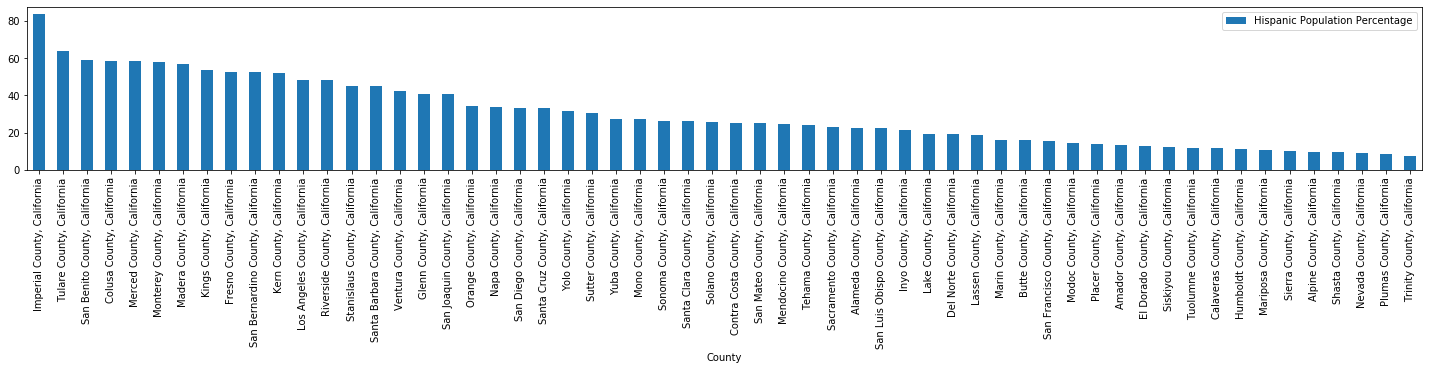

In [49]:
plot_final_cali_census_df = final_cali_census_df[["County","Hispanic Population Percentage"]].set_index("County").sort_values("Hispanic Population Percentage",ascending = False)
latino_distribution = plot_final_cali_census_df.plot(kind='bar',figsize=(25,3))

In [24]:
# Create location coordinates to plot on my map
heat_locations = final_cali_census_df[['Latitude', 'Longitude']]

# Create map figure with coordinates
fig = gmaps.figure(map_type = "HYBRID")
heat_layer = gmaps.heatmap_layer(heat_locations, 
                                 dissipating=False,
                                 max_intensity=30, 
                                 weights = final_cali_census_df['Hispanic Population Percentage'],
                                 point_radius=.3)

# Find highest latino populated communities 
top_communities = final_cali_census_df.sort_values('Hispanic Population Percentage',ascending=False)\
[['County','Hispanic Population Percentage','Latitude','Longitude','Hispanic Population']].head(3)


# Adding county Lat & Log coordinates for highest latino populated communities
marker_locations = top_communities[['Latitude', 'Longitude']]

# Create second layer
markers = gmaps.symbol_layer(marker_locations, 
                             info_box_content=[f"Hispanic Population: {round(rate,1)}%" for rate in list(top_communities['Hispanic Population Percentage'])],
                             stroke_color= 'blue',
                             scale=3)
# Add Layers to map figure
fig.add_layer(markers)
fig.add_layer(heat_layer)                     
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
#Print details on the top Latino populated commmunities
top_communities_df = top_communities[['County','Hispanic Population','Hispanic Population Percentage']]
top_communities_df.reset_index(drop=True,inplace=True)
top_communities_df

,County,Hispanic Population,Hispanic Population Percentage
0,"Imperial County, California",150108.0,83.41
1,"Tulare County, California",291867.0,63.61
2,"San Benito County, California",34561.0,58.91
